[View in Colaboratory](https://colab.research.google.com/github/tsumankumar/AIML/blob/master/Lab10_Experiment1.ipynb)

# Foundations of AI & ML
## Session 10
### Experiment 1

In this experiment we will see the "Auto Encoder neural network." we will use MNIST as our dataset.

**Auto Encoders** are a specific type of feedforward neural networks where the input is the same as the output. They compress the input into a lower-dimensional code and then reconstruct the output from this representation.

#### Loading the required packages

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision.datasets as dsets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Defining the parameters

In [0]:
EPOCH = 10
batch_size = 64
LR = 0.005      
DOWNLOAD_MNIST = False
### Number of images we want to test on
N_TEST_IMG = 100

#### Loading MNIST dataset from torchvision datasets

In [7]:
#Loading the train set file
train_data = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
#Loading the test set file
test_data = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

Processing...
Done!


#### Visulaizing one of the training data

torch.Size([60000, 28, 28])
torch.Size([60000])


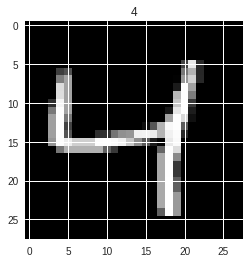

In [8]:
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [0]:
#loading the train dataset
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# loading the test dataset

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=True)

#### Now let us construct the autoencoder neural network

In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            # activation functions
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            #activation functions
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

#### Now let us plot the original image and decoded image. First plot is original image and second plot is decoded image. We will also calculate the training loss for every epoch in steps. 

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784)
    (7): Sigmoid()
  )
)
Epoch:  0 | train loss: 0.2321


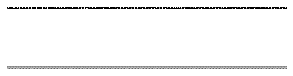

Epoch:  0 | train loss: 0.0492


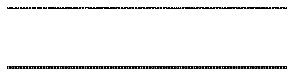

Epoch:  5 | train loss: 0.0375


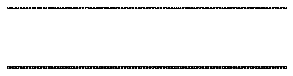

Epoch:  5 | train loss: 0.0372


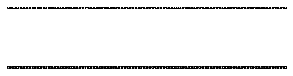

Epoch:  9 | train loss: 0.0337


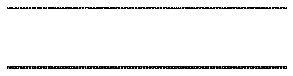

Epoch:  9 | train loss: 0.0386


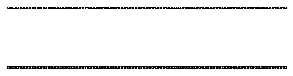

In [11]:
autoencoder = AutoEncoder()
print(autoencoder)

# Initialization of Optimizer
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
## Initialization of Mean Square Error
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0])
            # plotting decoded image (second row)
            encoded_data, decoded_data = autoencoder(view_data)
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            #Plotting orginal images
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
            # Plotting the decoded images
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); 

Applying Autoencoders on the test data and finding the loss on the test dataset

In [0]:
autoencoder = AutoEncoder()
print(autoencoder)

# Initialization of Optimizer
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
## Initialization of Mean Square Error
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(test_data.test_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

for b_x in range(EPOCH):
    for step, (x, y) in enumerate(test_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)
print(loss)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)
Variable containing:
 0.2311
[torch.FloatTensor of size 1]



In previous experiments we have used PCA technique for dimensionality reduction which is restricted to linear map while auto encoders can have nonlinear enoder/decoders.

Applying PCA Reconstruction on the test data and calculating the loss.we can see that the autoencoders are more compact than PCA.

In [0]:
from sklearn.decomposition import PCA
import numpy as np
# Reconstruct original data
# Perform PCA for three components
pca = PCA(3)
loss = 0
for step, (x, y) in enumerate(test_loader):
        b_x = (x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = (x.view(-1, 28*28))
        b_x = np.array(b_x)
        b_y = np.array(b_y)
        data_reduced = pca.fit_transform(b_x)
        data_reconstructed = pca.inverse_transform(data_reduced)
        #loss += ((abs(data_reconstructed) - (b_x)) ** 2)
        loss += ((b_x - data_reconstructed) ** 2).mean()
print(loss)

7.353468950837851


From above we can observe that pca loss is greater thab autoencoder loss attributed to the non-linearty reduction.